# Class project

### 1. Build a Pokemon classifier system using CNN
You can get the data from: https://www.kaggle.com/lantian773030/pokemonclassification


This is my second attempt project1.
* use ImageDataGenerator, the Keras preprocessing image 
* use Adam as a optimizer
* consists of 4 conv blocks

In [0]:
import os
!pip install -q kaggle

os.environ['KAGGLE_USERNAME'] = 'nuttrawitra'
os.environ['KAGGLE_KEY'] = '831c5dd1a9d4dc10d7856c05db8dfe5d' 
! kaggle datasets download -d lantian773030/pokemonclassification

! unzip pokemonclassification.zip

Streaming output truncated to the last 5000 lines.
  inflating: PokemonData/Golbat/7b7a064d3a1b4c53a9be936d4e4e3bab.jpg  
  inflating: PokemonData/Golbat/7d07fd6776fb40e9986a1a0f62233325.jpg  
  inflating: PokemonData/Golbat/815b279060b94e12a6b35d434a5250c2.jpg  
  inflating: PokemonData/Golbat/818014085ff04885b31eb5e8737012f2.jpg  
  inflating: PokemonData/Golbat/87529331a47b4a5cb5d10a6b3ea46d84.jpg  
  inflating: PokemonData/Golbat/914fab74d32e49a98940d5ba7f674fa6.jpg  
  inflating: PokemonData/Golbat/949a05bd0ad44be993e5fd89a8f582df.jpg  
  inflating: PokemonData/Golbat/9a4c793b9b0042a99ebd540897f9f898.jpg  
  inflating: PokemonData/Golbat/a35b4e8e603c485cb197520af30e1208.jpg  
  inflating: PokemonData/Golbat/a45a14a67a7348bba57c06467bb73cde.jpg  
  inflating: PokemonData/Golbat/acc2b44eada74a25a64c041b2e80c453.jpg  
  inflating: PokemonData/Golbat/af30483e382240d38890dec39e083b08.jpg  
  inflating: PokemonData/Golbat/b451127866894007bbd42cf9d6133b8d.jpg  
  inflating: PokemonData/G

In [0]:
import os, sys
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization, Activation

Using TensorFlow backend.


In [0]:
fullpath = []
path = "PokemonData"
dirs = os.listdir( path )

for files in dirs:
    file = os.listdir( path + "/" + files )
    img_path = []
    for img in file:  
          img_path.append( path + "/" + files + "/" + img )
    fullpath.append(img_path) 

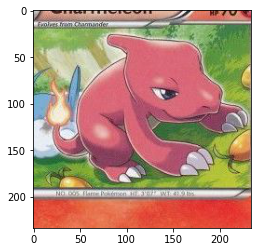

(234, 234, 3)


In [0]:
img = mpimg.imread(fullpath[18][1]).astype('float32') / 255
plt.imshow(img)
plt.show()
print(img.shape)

> Using ImageDataGenerator, the Keras image preprocessing, to split into train data and validation data with the size of 256, 256, 3

In [0]:
IDG = ImageDataGenerator(validation_split = 0.15)
train_generator = IDG.flow_from_directory(
    'PokemonData', target_size=(256, 256), class_mode = 'categorical', 
    batch_size=64, shuffle = True, subset='training') 
validation_generator = IDG.flow_from_directory(
    'PokemonData', target_size=(256, 256), batch_size=64, 
    shuffle = True, subset='validation') 

Found 5865 images belonging to 150 classes.
Found 955 images belonging to 150 classes.


> Using Sequential Keras model which consists of
* Conv2D layer
* BatchNormalization layer
* Activation (Relu) layer
* MaxPool2D layer
* Dropout layer

In [0]:
model = Sequential()

model.add(Conv2D(64,  (3,3) , input_shape=(256,256,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64,  (3,3) , padding='same'))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(32,  (3,3) , padding='same'))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(16,  (3,3) , padding='same'))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(150, activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 64)      1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 256, 256, 64)      256       
_________________________________________________________________
activation (Activation)      (None, 256, 256, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 64)      36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 128, 64)      2

> compile the  model by using Adam as the optimizer and categorical crossentropy as loss <br>
> by very epoch will give the following values : loss, accuracy, validation loss, validation accuracy

In [0]:
model.compile(optimizer = tf.keras.optimizers.Adam() , loss = tf.keras.losses.categorical_crossentropy, metrics=['accuracy'])
history = model.fit(
        train_generator,
        steps_per_epoch = train_generator.n//64,
        validation_data = validation_generator,
        validation_steps = validation_generator.n//64,
        epochs=20)

Epoch 1/20
91/91 [==============================] - 48s 524ms/step - loss: 3.7329 - accuracy: 0.1848 - val_loss: 4.3528 - val_accuracy: 0.1775
Epoch 2/20
91/91 [==============================] - 47s 521ms/step - loss: 1.9155 - accuracy: 0.5204 - val_loss: 2.5305 - val_accuracy: 0.3929
Epoch 3/20
91/91 [==============================] - 47s 521ms/step - loss: 1.1910 - accuracy: 0.6990 - val_loss: 2.3838 - val_accuracy: 0.4051
Epoch 4/20
91/91 [==============================] - 47s 520ms/step - loss: 0.7670 - accuracy: 0.8059 - val_loss: 2.6737 - val_accuracy: 0.3839
Epoch 5/20
91/91 [==============================] - 48s 523ms/step - loss: 0.4794 - accuracy: 0.8817 - val_loss: 2.4348 - val_accuracy: 0.4275
Epoch 6/20
91/91 [==============================] - 47s 522ms/step - loss: 0.2839 - accuracy: 0.9390 - val_loss: 2.3288 - val_accuracy: 0.4587
Epoch 7/20
91/91 [==============================] - 48s 523ms/step - loss: 0.2024 - accuracy: 0.9610 - val_loss: 1.9649 - val_accuracy: 0.5290

> after train the model, the conclusion are
* Accuracy = 0.9953  ->  means this model have accuracy to predict the train pokemon image about 99.5 percentage 
* Validation Accuracy = 0.5446  ->  means this model have accuracy to predict the unseen pokemon image about 54 percentage

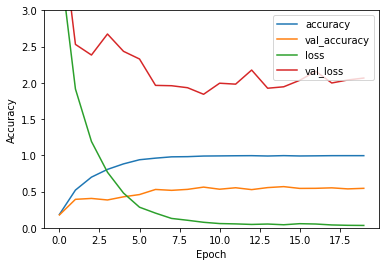

In [76]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 3])
plt.legend(loc='upper right')


In [0]:
model.save('my_second_model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: my_second_model/assets


In [60]:
true_label = validation_generator.class_indices
data = next(validation_generator)
label = data[1]
data = data[0]
data.shape

(64, 256, 256, 3)

In [62]:
true_label

{'Abra': 0,
 'Aerodactyl': 1,
 'Alakazam': 2,
 'Alolan Sandslash': 3,
 'Arbok': 4,
 'Arcanine': 5,
 'Articuno': 6,
 'Beedrill': 7,
 'Bellsprout': 8,
 'Blastoise': 9,
 'Bulbasaur': 10,
 'Butterfree': 11,
 'Caterpie': 12,
 'Chansey': 13,
 'Charizard': 14,
 'Charmander': 15,
 'Charmeleon': 16,
 'Clefable': 17,
 'Clefairy': 18,
 'Cloyster': 19,
 'Cubone': 20,
 'Dewgong': 21,
 'Diglett': 22,
 'Ditto': 23,
 'Dodrio': 24,
 'Doduo': 25,
 'Dragonair': 26,
 'Dragonite': 27,
 'Dratini': 28,
 'Drowzee': 29,
 'Dugtrio': 30,
 'Eevee': 31,
 'Ekans': 32,
 'Electabuzz': 33,
 'Electrode': 34,
 'Exeggcute': 35,
 'Exeggutor': 36,
 'Farfetchd': 37,
 'Fearow': 38,
 'Flareon': 39,
 'Gastly': 40,
 'Gengar': 41,
 'Geodude': 42,
 'Gloom': 43,
 'Golbat': 44,
 'Goldeen': 45,
 'Golduck': 46,
 'Golem': 47,
 'Graveler': 48,
 'Grimer': 49,
 'Growlithe': 50,
 'Gyarados': 51,
 'Haunter': 52,
 'Hitmonchan': 53,
 'Hitmonlee': 54,
 'Horsea': 55,
 'Hypno': 56,
 'Ivysaur': 57,
 'Jigglypuff': 58,
 'Jolteon': 59,
 'Jynx': 60,

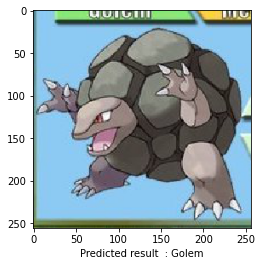

In [72]:
predicted = model.predict_classes(data)
for po_name, number in true_label.items():
    if number == predicted[0]:
        name = po_name
plt.imshow(data[0].astype('uint8'))
plt.xlabel('Predicted result  : '+ name)
plt.show()

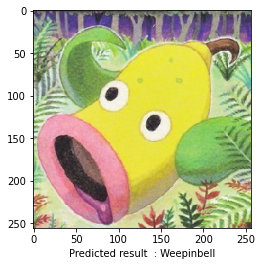

In [78]:
predicted = model.predict_classes(data)
for po_name, number in true_label.items():
    if number == predicted[1]:
        name = po_name
plt.imshow(data[1].astype('uint8'))
plt.xlabel('Predicted result  : '+ name)
plt.show()